### Imports and Data-Preperation

In [1]:
%pip install -q matplotlib
%pip install -q numpy


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

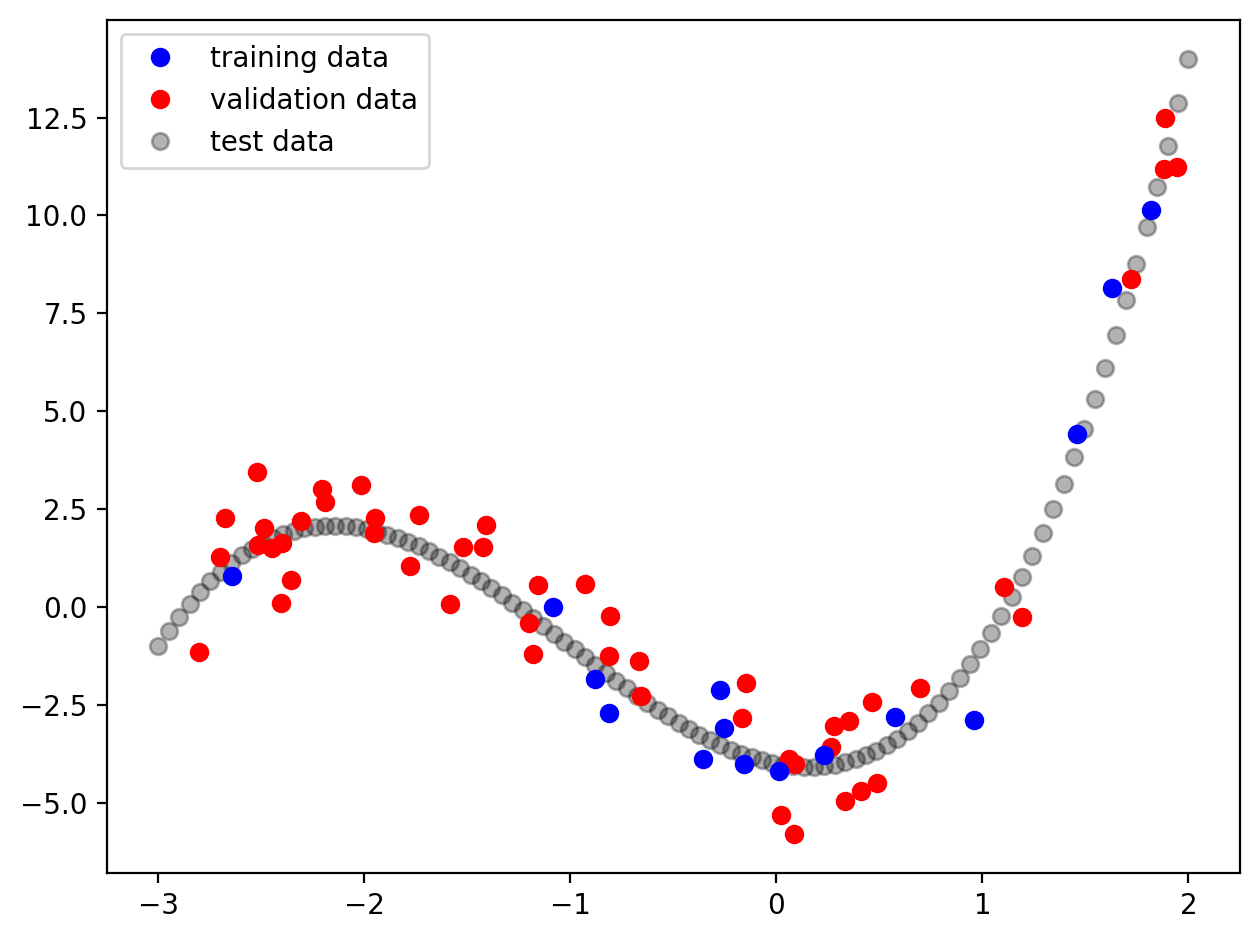

In [3]:
# Set random seed to obtain reproducible results
np.random.seed(0)

# Load training, validation and test datasets
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

x_valid = np.load('x_valid.npy')
y_valid = np.load('y_valid.npy')

x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

# Plot the data
plt.figure(dpi=200, tight_layout=True)
plt.plot(x_train, y_train, 'ob', label='training data', zorder=20)
plt.plot(x_valid, y_valid, 'or', label='validation data',zorder=10)
plt.plot(x_test, y_test, 'ok', label='test data', alpha=0.3, zorder=0)
plt.legend()
plt.show()

### Visualizations

In [4]:
def kernel_vectors_to_plot(x_data, kernel_vectors):
    plt.figure(dpi=70, tight_layout=True)
    for kernel in kernel_vectors:
        plt.plot(x_data, kernel, 'b')

    return plt

In [5]:
def kernel_function_in_grid(kernel_func, x_range=[0,10], y_range=[0,10]):
    x = np.linspace(x_range[0], x_range[1], 100)
    y = np.linspace(y_range[0], y_range[1], 100)
    X, Y = np.meshgrid(x, y)
    
    kernel_values = kernel_func(X, Y)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, kernel_values, levels=50, cmap='viridis')
    plt.colorbar(label='Kernel Value')
    plt.title('Gaussian Kernel Grid Visualization')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [20]:
x_train.shape, x_test.shape

((15, 1), (100, 1))

### Kernel Definitions

Gaussian Kernel
$$
k(x_i,x_j)=\exp(-\frac{\|x_i-x_j\|^2}{2\sigma^2})
$$

In [6]:
# def gaussian_kernel(X_t: np.ndarray, X_q: np.ndarray, sigma: float) -> np.ndarray:
#     diff = X_t[:, None, :] - X_q[None, :, :]
#     diff_norm = np.linalg.norm(diff, axis=2)
#     kernel_vectors = np.exp(-(diff_norm)**2 / (2 * sigma**2))

#     return kernel_vectors

In [7]:
def gaussian_kernel(X_t: np.ndarray, X_q: np.ndarray, sigma: float) -> np.ndarray:
    return np.exp(-(X_t - X_q) ** 2) / (2 * sigma**2)

Ornstein-Uhlenbeck Process
$$
k(x_i,x_j)=\exp(-\theta\|x_i-x_j\|)
$$

In [8]:
# def ornstein_uhlenbeck(X_t: np.ndarray, X_q: np.ndarray, theta: float) -> np.ndarray:
#     diff = X_t[:, None, :] - X_q[None, :, :]
#     diff_norm = np.linalg.norm(diff, axis=2)
#     kernel_vectors = np.exp(-theta * diff_norm)

#     return kernel_vectors

In [9]:
def ornstein_uhlenbeck(X_t: np.ndarray, X_q: np.ndarray, theta: float) -> np.ndarray:
    return  np.exp(-theta * np.abs(X_t - X_q))

Linear Kernel
$$
k(x_i, x_j) = \langle x_i, x_j \rangle
$$

In [10]:
def linear_kernel(X_t: np.ndarray, X_q: np.ndarray) -> np.ndarray:
    # return np.dot(X_t, X_q)
    return X_t * X_q

### Kernel Evaluations

Kernel functions ...

#### Kernel Functions - Grid Values

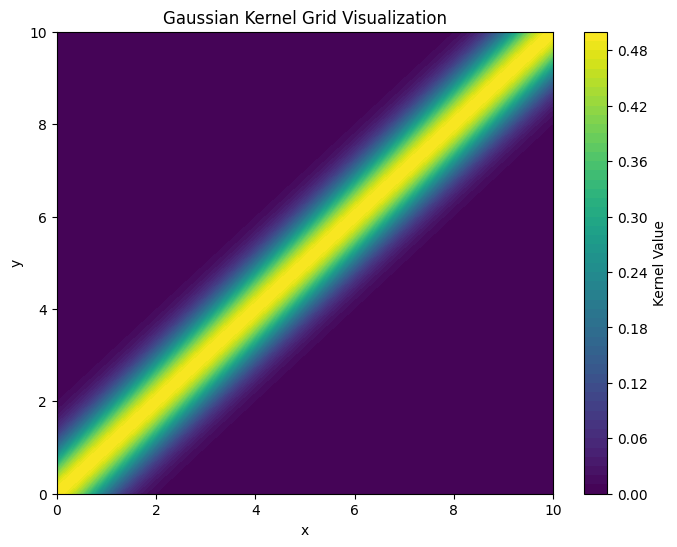

In [11]:
kernel_lambda = lambda X, Y: gaussian_kernel(X, Y, 1)
kernel_function_in_grid(kernel_lambda)

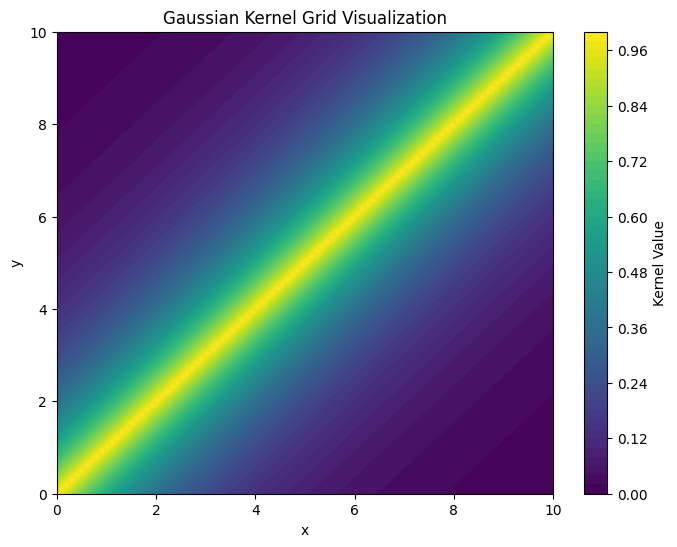

In [12]:
kernel_lambda = lambda X, Y: ornstein_uhlenbeck(X, Y, 0.5)
kernel_function_in_grid(kernel_lambda)

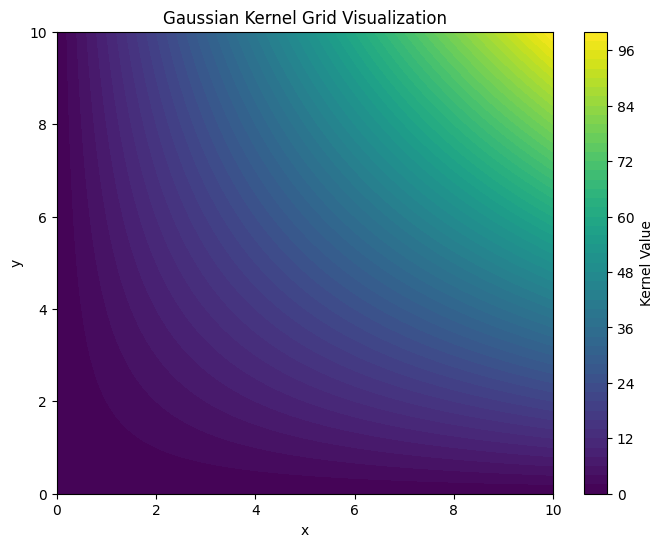

In [13]:
kernel_lambda = lambda X, Y: linear_kernel(X, Y)
kernel_function_in_grid(kernel_lambda)

#### Kernel Functions - Function Approximation

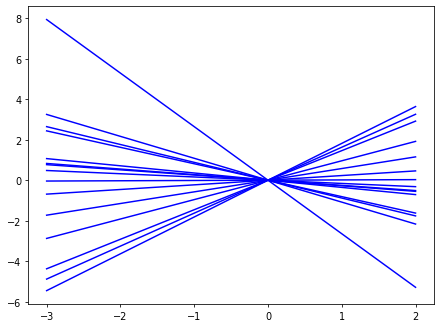

In [14]:
lk_vectors = linear_kernel(x_train, np.transpose(x_test))

kernel_vectors_to_plot(x_test, lk_vectors).show()

In [23]:
x_train.shape, x_test.shape

((15, 1), (100, 1))

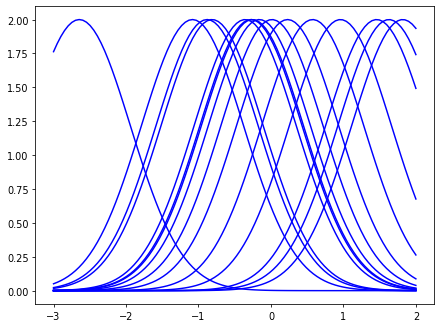

In [15]:
# Gaussian Kernel
gk_vectors = gaussian_kernel(x_train, np.transpose(x_test), 0.5)

kernel_vectors_to_plot(x_test, gk_vectors).show()

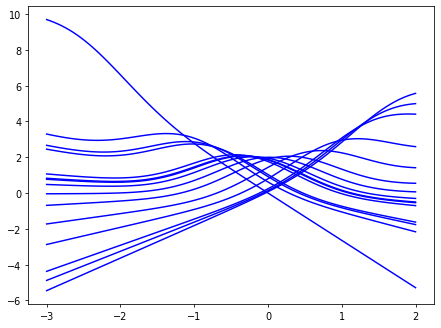

In [16]:
# Gaussian Kernel + Linear Kernel
kernel_vectors_to_plot(x_test, lk_vectors + gk_vectors).show()

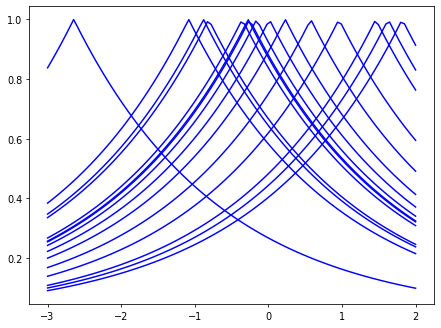

In [17]:
# Ornstein Uhlenbeck Kernel
ok_vectors = ornstein_uhlenbeck(x_train, np.transpose(x_test), 0.5)

kernel_vectors_to_plot(x_test, ok_vectors).show()

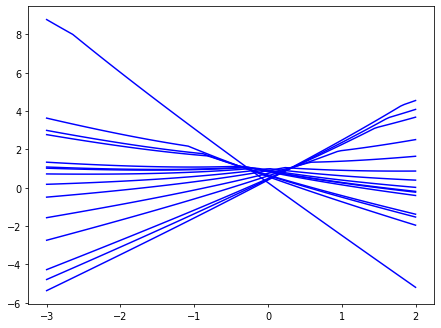

In [18]:
# Ornstein Uhlenbeck Kernel + Linear Kernel
kernel_vectors_to_plot(x_test, lk_vectors + ok_vectors).show()